In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import folium
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import requests

In [9]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'  
data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])


print(data.head())


data['class'] = data['class'].astype('category').cat.codes


print(data.info())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB
None


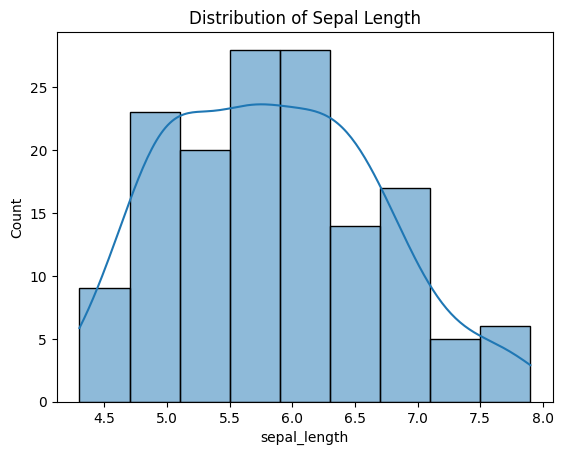

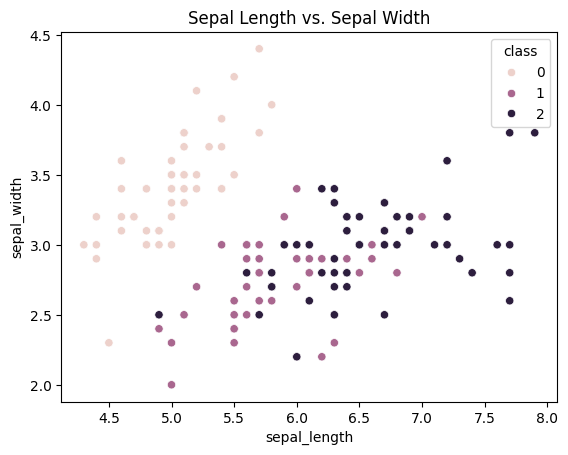

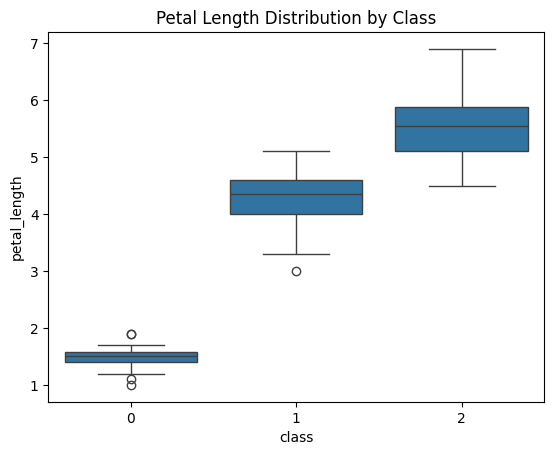

In [10]:
sns.histplot(data['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.show()


sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=data)
plt.title('Sepal Length vs. Sepal Width')
plt.show()


sns.boxplot(x='class', y='petal_length', data=data)
plt.title('Petal Length Distribution by Class')
plt.show()

In [11]:
import sqlite3


conn = sqlite3.connect(':memory:')
data.to_sql('iris_data', conn, index=False)


query = "SELECT class, AVG(sepal_length) FROM iris_data GROUP BY class;"
avg_sepal_length = pd.read_sql(query, conn)
print(avg_sepal_length)


query = "SELECT class, COUNT(*) FROM iris_data GROUP BY class;"
class_counts = pd.read_sql(query, conn)
print(class_counts)

   class  AVG(sepal_length)
0      0              5.006
1      1              5.936
2      2              6.588
   class  COUNT(*)
0      0        50
1      1        50
2      2        50


In [12]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=10) 

m.save('iris_map.html')